# Newark Flight Delay Analysis WIP

This project will analyze data from the DOT about flight delays at Newark aiport (EWR) during 2024. The four airlines whose data I will be working with are United Airlines, American Airlines, Spirit Airlines, and Frontier Airlines. 

Some possible questions to be considered are:
- How does the length of a delay related to the time of day of the scheduled departure? 
- What percentage of flights were delayed for each airline, and is there a statistically significant difference between them?
- What percentage of flights left early for each ariline, and is there a statistically significant difference between them?
- What are the proportion of flights delayed by less than 15 minutes, 30 minutes, 1 hour, and 2 hours for each airline and are the results signifcantly different by airline?
- How does the length of weather caused delays relate to the day of the year?
- Is there a statistically significant difference in the distributions of the taxi-out time for delayed and non-delayed flights?

Table of Contents:

1. [Variable Definitions](#variable_def)
2. [Data Cleaning](#cleaning_data)
    1. [Analysis](#cleaning_data_analysis)
3. [How does the delay length change based on the scheduled departure time?](#delay_day_time)
    1. [First Look at the Data](#delay_day_time_first_look)
    2. [Analysis of Delay Time Histogram and Scatterplot](#delay_day_time_plan_analysis)
    3. [Linear Regression](#delay_day_time_plan_regression)
    4. [Conclusions](#delay_day_time_conclusion)
4. [What percentage of flights were delayed for each airline, and is there a statistically significant difference between them?](#percent_delay_by_airline)

<a id='variable_def'></a>
## Variable Definitions

In the context of this dataset delays are measured as the difference between when a plane was scheduled to leave the gate and when it actually left the gate. For this reason, there are some values of the column Departure delay (Minutes) which are negative representing a plane that left the gate early. The time between a plane departing the gate and wheels off is measured separately as part of the Taxi-Out time (Minutes). 

TODO: insert explanation of the different types of delay

In [1]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import numpy as np
from datetime import datetime

In [2]:
#import data
united_df = pd.read_csv('Delay_Data/United_Airlines.csv', skiprows = 6)
american_df = pd.read_csv('Delay_Data/American_Airlines.csv', skiprows = 6)
spirit_df = pd.read_csv('Delay_Data/Spirit_Airlines.csv', skiprows = 6)
frontier_df = pd.read_csv('Delay_Data/Frontier_Airlines.csv', skiprows = 6)

In [3]:
print(united_df.head())

  Carrier Code Date (MM/DD/YYYY)  Flight Number Tail Number  \
0           UA        01/01/2024          210.0      N897UA   
1           UA        01/01/2024          235.0      N38467   
2           UA        01/01/2024          254.0      N47280   
3           UA        01/01/2024          292.0      N61886   
4           UA        01/01/2024          293.0      N17122   

  Destination Airport Scheduled departure time Actual departure time  \
0                 AUS                    07:15                 07:08   
1                 MIA                    20:20                 20:38   
2                 PBI                    16:03                 15:53   
3                 PBI                    14:12                 14:08   
4                 MCO                    10:27                 10:52   

   Scheduled elapsed time (Minutes)  Actual elapsed time (Minutes)  \
0                             262.0                          237.0   
1                             190.0             

<a id='cleaning_data'></a>
## Data Cleaning

Before doing any analysis, I will start with making sure the dataset is complete and there are no missing values.

In [4]:
# United data
print(united_df.info())
print(united_df.loc[united_df.isnull().any(axis=1)])

#The last row of data must be dropped as it represents a citation and not relevant data

# Remove the last row
united_df = united_df.head(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57382 entries, 0 to 57381
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              57382 non-null  object 
 1   Date (MM/DD/YYYY)                         57381 non-null  object 
 2   Flight Number                             57381 non-null  float64
 3   Tail Number                               55878 non-null  object 
 4   Destination Airport                       57381 non-null  object 
 5   Scheduled departure time                  57381 non-null  object 
 6   Actual departure time                     57381 non-null  object 
 7   Scheduled elapsed time (Minutes)          57381 non-null  float64
 8   Actual elapsed time (Minutes)             57381 non-null  float64
 9   Departure delay (Minutes)                 57381 non-null  float64
 10  Wheels-off time                   

In [5]:
#American data
print(american_df.info())
print(american_df.loc[american_df.isnull().any(axis=1)])

#The last row of data must be dropped as it represents a citation and not relevant data

# Remove the last row
american_df = american_df.head(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              5804 non-null   object 
 1   Date (MM/DD/YYYY)                         5803 non-null   object 
 2   Flight Number                             5803 non-null   float64
 3   Tail Number                               5803 non-null   object 
 4   Destination Airport                       5803 non-null   object 
 5   Scheduled departure time                  5803 non-null   object 
 6   Actual departure time                     5803 non-null   object 
 7   Scheduled elapsed time (Minutes)          5803 non-null   float64
 8   Actual elapsed time (Minutes)             5803 non-null   float64
 9   Departure delay (Minutes)                 5803 non-null   float64
 10  Wheels-off time                     

In [6]:
#Spirit data
print(spirit_df.info())
print(spirit_df.loc[spirit_df.isnull().any(axis=1)])

#The last row of data must be dropped as it represents a citation and not relevant data

# Remove the last row
spirit_df = spirit_df.head(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              9048 non-null   object 
 1   Date (MM/DD/YYYY)                         9047 non-null   object 
 2   Flight Number                             9047 non-null   float64
 3   Tail Number                               9047 non-null   object 
 4   Destination Airport                       9047 non-null   object 
 5   Scheduled departure time                  9047 non-null   object 
 6   Actual departure time                     9047 non-null   object 
 7   Scheduled elapsed time (Minutes)          9047 non-null   float64
 8   Actual elapsed time (Minutes)             9047 non-null   float64
 9   Departure delay (Minutes)                 9047 non-null   float64
 10  Wheels-off time                     

In [7]:
#Clean the Frontier data
print(frontier_df.info())
print(frontier_df.loc[frontier_df.isnull().any(axis=1)])

#The last row of data must be dropped as it represents a citation and not relevant data

# Remove the last row
frontier_df = frontier_df.head(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              198 non-null    object 
 1   Date (MM/DD/YYYY)                         197 non-null    object 
 2   Flight Number                             197 non-null    float64
 3   Tail Number                               193 non-null    object 
 4   Destination Airport                       197 non-null    object 
 5   Scheduled departure time                  197 non-null    object 
 6   Actual departure time                     197 non-null    object 
 7   Scheduled elapsed time (Minutes)          197 non-null    float64
 8   Actual elapsed time (Minutes)             197 non-null    float64
 9   Departure delay (Minutes)                 197 non-null    float64
 10  Wheels-off time                       

<a id='cleaning_data_analysis'></a>
### Analysis

From a quick look at the information in the dataframes we could see that the last row on all the imported data must be deleted as it represents not relevant data, but a citation at the end of all the files for the DOT. The only dataframe with data missing was the United Airlines data which is missing some tail number data. None of the proposed questions would have used this information so this does not pose a problem for analysis. 

Our results also indicate that United Airlines had the largest presence of the four airlines at EWR with 57381 flights during 2024, while  Spirit Airlines had 9047, American Airlines had 5803, and Frontier Airlines had 197. Thus, any conclusions we draw about EWR from this data will be highly influenced by United Airlines. 

All of the cleaned dataframes will be merged into one complete flight_df which will allow for easier comparison between airlines with an extra column added to indicate which airline the flight is from. We will also take the 'Date (MM/DD/YYYY)' and 'Scheduled departure time' columns and convert them to datetime variables to make later calculations easier.

In [8]:
#Add a column to label which airline the flight is part of
united_df['Airline'] = 'United'
american_df['Airline'] = 'American'
spirit_df['Airline'] = 'Spirit'
frontier_df['Airline'] = 'Frontier'

#Create a combined dataframe 
flight_df = pd.concat([united_df, american_df, spirit_df, frontier_df], axis=0, ignore_index = True)

#Create Date Datetime column from 'Date (MM/DD/YYYY)' string column
flight_df['Date datetime'] = pd.to_datetime(flight_df['Date (MM/DD/YYYY)'], format='%m/%d/%Y')

#Create Scheduled departure time datetime column from 'Scheduled departure time' string column
flight_df['Scheduled departure time datetime'] = pd.to_datetime(flight_df['Scheduled departure time'], format='%H:%M')

<a id='delay_day_time'></a>
## How does the delay length change based on the scheduled departure time?

In this section we will first look at how the length departure delays relate to the scheduled departure time which is measured down to the minute. We will see if it is possible to measure the relationship between the delays over the course of the day. In this analysis we will focus only on flights who have a delay greater than 0 minutes, not considering those flights which leave early or on-time as they are not delayed. 

<a id='delay_day_time_first_look'></a>
### First Look at the Data

To examine the data we will first create a histogram of the delay times and a scatterplot of the delay times with respect to the scheduled departure time. This will allow us to determine the best model to fit to our data and how to best visualize it.

In [9]:
# Add a column titled Positive Delay which will be a binary variable indicating if the delay was greater than 0 minutes
flight_df['Positive Delay'] = [False if delay <= 0 else True for delay in flight_df['Departure delay (Minutes)']]

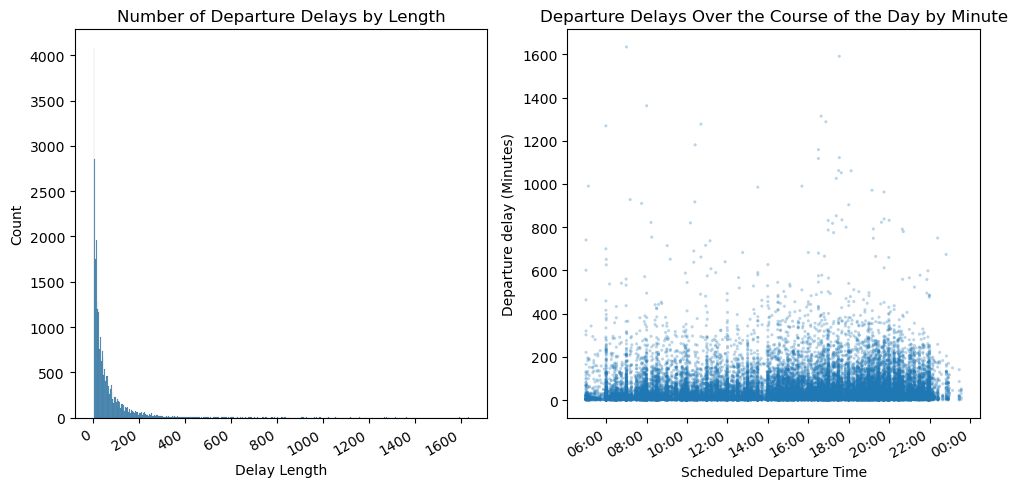

<Figure size 1000x500 with 0 Axes>

In [10]:
#Plot initial scatterplot of delay lengths over the course of the day
plt.rcParams["figure.figsize"] = [10.0, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

#Create the histogram
sns.histplot(data = flight_df.loc[flight_df['Positive Delay'] == True], x = 'Departure delay (Minutes)', ax = axes[0])
axes[0].set_xlabel('Delay Length')
axes[0].set_title('Number of Departure Delays by Length')

# Create the scatterplot
sns.scatterplot(data = flight_df.loc[flight_df['Positive Delay'] == True], x = 'Scheduled departure time datetime', y = 'Departure delay (Minutes)', alpha = 0.3, s=5, edgecolor='none', ax = axes[1])
axes[1].xaxis.set_major_formatter(DateFormatter("%H:%M")) 
plt.gcf().autofmt_xdate()
axes[1].set_xlabel('Scheduled Departure Time')
axes[1].set_title('Departure Delays Over the Course of the Day by Minute')

plt.show()
plt.clf()

<a id='delay_day_time_plan_analysis'></a>
### Analysis of Delay Time Histogram and Scatterplot

An initial look at the data in the histogram indicates that the vast majority of the flights have a delay that is less than 200 minutes, with delay times longer than that being outliers. We can also see a slight increase in delay lengths throughout the course of the day from the scatterplot.

<a id='delay_day_time_plan_regression'></a>
### Linear Regression

Since there is no obvious curevliniar pattern, we will make a simple linear regression in the format of y=mx+b to quantify how the departure time affects departure delays. 

Due to the fact that the statsmodels.OLS.from_formula treats datetimes as categorical variables and not linear variables, I will create a column which measures the scheduled departure time as the number of minutes after the earliest scheduled departure which will allow the model to create a proper analysis.

In [11]:
# Create column of scheduled departure as the number of minutes after the first scheduled departure
earliest_flight_datetime = flight_df['Scheduled departure time datetime'].min()
latest_flight_datetime = flight_df['Scheduled departure time datetime'].max()
latest_minus_earliest_flight_datetime = latest_flight_datetime - earliest_flight_datetime
latest_flight_minutes_after_earliest = latest_minus_earliest_flight_datetime.total_seconds()/60

flight_df['Scheduled departure minutes'] = (flight_df['Scheduled departure time datetime']-earliest_flight_datetime).dt.total_seconds()/60

In [12]:
# Create the delay model
delay_over_day_minutes_model = sm.OLS.from_formula('Q("Departure delay (Minutes)") ~ Q("Scheduled departure minutes")', data=flight_df)
# Fit the delay model
delay_over_day_minutes_results = delay_over_day_minutes_model.fit()
# Pring the coefficients
print(delay_over_day_minutes_results.params)
# Print the r-squared value
print('R-squared: ',delay_over_day_minutes_results.rsquared)

Intercept                           2.157808
Q("Scheduled departure minutes")    0.026852
dtype: float64
R-squared:  0.02108798710205062


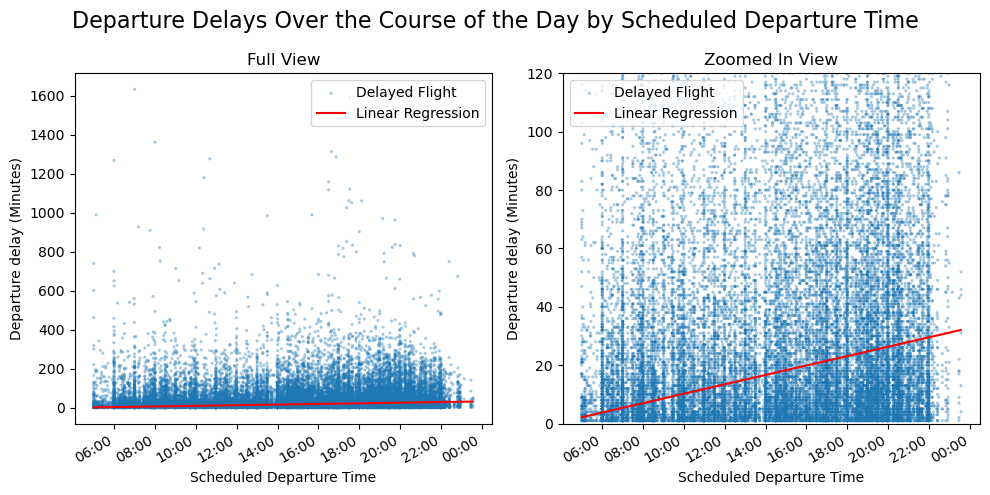

<Figure size 1000x500 with 0 Axes>

In [13]:
# Plot the fitted model over the scatterplot

# To plot the model we will create columns of the same times measured as minutes after the earliest flight, and as a datetime
flight_departure_after_earliest_df=pd.DataFrame(range(0, int(latest_flight_minutes_after_earliest), 1), columns = ['Minutes'])
flight_departure_after_earliest_df['TimeDelta'] = pd.to_timedelta(flight_departure_after_earliest_df['Minutes'], unit='m')
flight_departure_after_earliest_df['Datetime'] = flight_departure_after_earliest_df['TimeDelta'] + earliest_flight_datetime

#Plot the fitted model over the fully zoomed out scatterplot
plt.rcParams["figure.figsize"] = [10.0, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.scatterplot(data = flight_df.loc[flight_df['Positive Delay'] == True], x = 'Scheduled departure time datetime', y = 'Departure delay (Minutes)', alpha = 0.4, s=5, edgecolor='none',ax=axes[0], label = 'Delayed Flight')
axes[0].xaxis.set_major_formatter(DateFormatter("%H:%M")) 
plt.gcf().autofmt_xdate()
sns.lineplot(x = flight_departure_after_earliest_df['Datetime'], y = delay_over_day_minutes_results.params.iloc[0]+delay_over_day_minutes_results.params.iloc[1]*flight_departure_after_earliest_df['Minutes'], color = 'red', ax=axes[0], label = 'Linear Regression')
axes[0].set_xlabel('Scheduled Departure Time')
axes[0].set_title('Full View')


#Plot the fitted model over a more zoomed in scatterplot
sns.scatterplot(data = flight_df.loc[flight_df['Positive Delay'] == True], x = 'Scheduled departure time datetime', y = 'Departure delay (Minutes)', alpha = 0.4, s=5, edgecolor='none',ax=axes[1], label = 'Delayed Flight')
axes[1].set_ylim(0,120)
axes[1].xaxis.set_major_formatter(DateFormatter("%H:%M")) 
plt.gcf().autofmt_xdate()
sns.lineplot(x = flight_departure_after_earliest_df['Datetime'], y = delay_over_day_minutes_results.params.iloc[0]+delay_over_day_minutes_results.params.iloc[1]*flight_departure_after_earliest_df['Minutes'], color = 'red', ax=axes[1], label = 'Linear Regression')
axes[1].set_xlabel('Scheduled Departure Time')
axes[1].set_title('Zoomed In View')


#Plot scatterplots and linear regression
f.suptitle("Departure Delays Over the Course of the Day by Scheduled Departure Time", fontsize=16)
plt.legend()
plt.show()
plt.clf()

<a id='delay_day_time_conclusion'></a>
### Conclusions

Having run our linear regression, we can see that for every minute later a delayed flight is planned to depart, we can expect that the length of the delay will be .027 minutes longer, that is adding 1.6 minutes to the delay time for every hour later that a flight is planned to depart.

This insight is not very enlightening though as the r-squared value on this regression is only about 2%, indicating that this model only accounts for about 2% of the variation in delay times. This is very obvious when observing the scatterplots above. While there is a slight increase in departure delay times throughout the course of the day, many are nowhere near the predicted value, many being slightly smaller, and many being much larger representing very long delays.

There are clearly many more factors in play than simply scheduled departure time which influence how long the length of a delay will be for a flight. Some other factors we may consider later are the airline, the destination airport, and the date of the flight. For now, while it may be wiser to select a flight earlier in the day to reduce delays, it should not play a large role in the decision making process for a prospective flyer out of Newark Airport.

<a id='percent_delay_by_airline'></a>
## What percentage of flights were delayed for each airline, and is there a statistically significant difference between them?